[  10.  540. 1040. 1600. 2120. 2640. 3200.] <class 'numpy.ndarray'>

[ 2.67184715  2.15948425  1.66139765  1.21392314  0.81831032  0.31237469
 -0.14310084] <class 'numpy.ndarray'>

[0.03761396 0.04653831 0.06049049 0.0827884  0.12281252 0.32172503
 0.70229325] <class 'numpy.ndarray'>



### Dati in input


 numero di classi:  7 


 xdata:  [  10.  540. 1040. 1600. 2120. 2640. 3200.] 


 ydata:  [ 2.67184715  2.15948425  1.66139765  1.21392314  0.81831032  0.31237469
 -0.14310084] 


 yerr:  [0.03761396 0.04653831 0.06049049 0.0827884  0.12281252 0.32172503
 0.70229325] 







### Dataframe di correlazione e fit

,Variabile,Valore
0,Coefficiente di corr.,-0.999280
1,Intercetta (a) [unma],2.664955
2,Coefficiente angolare (b) [unmb],-0.000914
3,Errore su a [unma],0.033102
4,Errore su b [unmb],0.000039
,Variabile,Valore
0,Livello di significatività,0.05
1,Gradi di libertà,5
2,Chi quadro,1.6459155729228596
3,Chi quadro critico,11.070497693516351


### Tabelle in LaTeX



\begin{table}[ht]
\centering
\caption{Dati relativi al fit lineare}
\label{corr184}
\begin{tabular}{lr}
\toprule
                       Variabile &    Valore \\
\midrule
           Coefficiente di corr. & -0.999280 \\
           Intercetta (a) [unma] &  2.664955 \\
Coefficiente angolare (b) [unmb] & -0.000914 \\
              Errore su a [unma] &  0.033102 \\
              Errore su b [unmb] &  0.000039 \\
\bottomrule
\end{tabular}
\end{table}



\begin{table}[ht]
\centering
\caption{Dati relativi al test del $\chi^2$}
\label{fit456}
\begin{tabular}{ll}
\toprule
                  Variabile &             Valore \\
\midrule
 Livello di significatività &               0.05 \\
           Gradi di libertà &                  5 \\
                Chi quadro  & 1.6459155729228596 \\
         Chi quadro critico & 11.070497693516351 \\
        Chi quadro sospetto & 1.1454762260617692 \\
                      Esito &          Accettato \\
Errore standard della stima & 0.0762861404456447 \\
\bot

/var/folders/87/zqr234w127l5z9vyf2g1llsr0000gn/T/ipykernel_71897/2304109890.py:278: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dfcorr.to_latex(index=False, caption='Dati relativi al fit lineare', bold_rows=True, label=indexcorr, position='ht'))
/var/folders/87/zqr234w127l5z9vyf2g1llsr0000gn/T/ipykernel_71897/2304109890.py:282: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dffit.to_latex(index=False,  caption='Dati relativi al test del $\chi^2$', bold_rows=Tru

### Figura in LaTeX


\begin{figure}[!ht]
\includegraphics[width=12cm]{ fig5217.png }
\centering
\caption{Fit lineare di tempo  e  y(=ln|S_max-S_eq|) }
\end{figure}




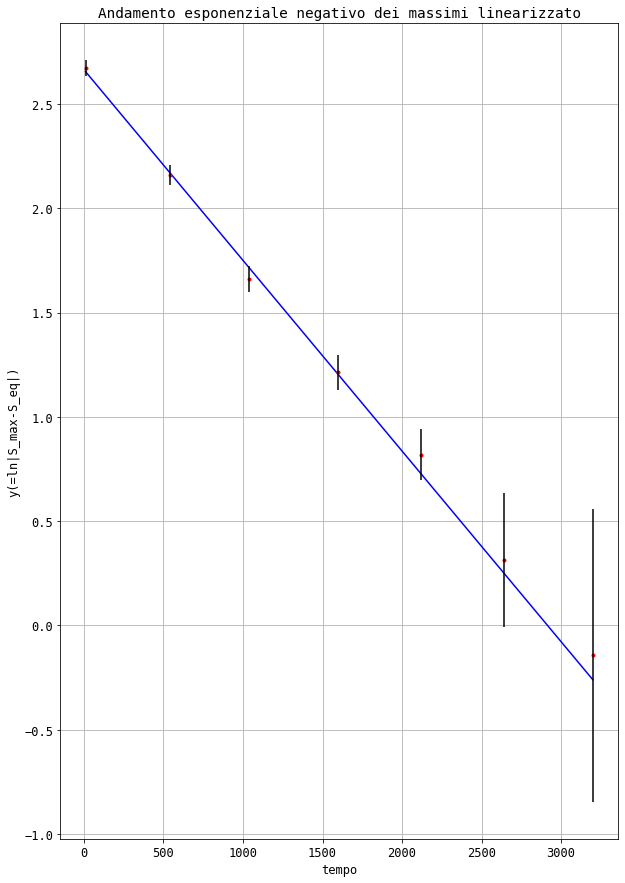

In [27]:
%store -r loptions


#Inserire livello di criticità es. (.05)
alpha=loptions[0]
#Inserire unità di misura di a e b:
unma=loptions[3]
unmb=loptions[4]

#Inserire dimensioni x (cm):
plot_xsize=loptions[1]

#Inserire Inserire titolo asse y (cm):
plot_ysize=loptions[2]

#Inserire titolo asse x:
customxlabel=loptions[5]

#Inserire titolo asse y:
customylabel=loptions[6]



#Inserire titolo del grafico:
customtitle=loptions[7]



#########input dataframe: 0.x 1.y 2.yerr 
#########input list 0.alpha 1.xsize 2.ysize 3.unma 4.unmb 5.xlabel 6.ylabel









import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown
import numpy as np
import scipy.stats
import csv
import pandas as pd
from random import randint
plt.rcParams['figure.figsize'] = [plot_xsize, plot_ysize]




%store -r dflinear



lxcol, lycol, lyerrcol = [], [], []

    
#Converto in array
xdatap = dflinear.iloc[0].values
ydatap = dflinear.iloc[1].values
yerrp  = dflinear.iloc[2].values

print(xdatap, type(xdatap))
print()
print(ydatap, type(ydatap))
print()
print(yerrp, type(yerrp))








##Display tables side by side

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
##Create or empty corr and fit csv
open('corr.csv', 'w').close()
open('fit.csv', 'w').close()

print('')
display(Markdown('### Dati in input'))

if (len(xdatap)!=len(ydatap)): print ("dimensioni vettori disuguali")
if (len(yerrp)!=len(ydatap)): print ("dimensioni vettori disuguali")
npoint = len(xdatap)
print('\n',"numero di classi: ",npoint,'\n')
print('\n',"xdata: ",xdatap,'\n')
print('\n',"ydata: ",ydatap,'\n')
print('\n',"yerr: ",yerrp,'\n')




yerrSq = yerrp*yerrp
sum_one_over_yerrSq = (1./yerrSq).sum()
sum_x_over_yerrSq = (xdatap/yerrSq).sum()
sum_xSq_over_yerrSq = (xdatap*xdatap/yerrSq).sum()
sum_y_over_yerrSq = (ydatap/yerrSq).sum()
sum_xy_over_yerrSq = (xdatap*ydatap/yerrSq).sum()

#Calcolo Coefficiente correlazione lineare

sum_x = (xdatap).sum()
sum_y = (ydatap).sum()
xmean=sum_x/npoint
ymean=sum_y/npoint
ameanx=xdatap-xmean
varx = (ameanx*ameanx).sum()
devstx = np.sqrt(varx)
ameany = ydatap-ymean
vary = (ameany*ameany).sum()
devsty = np.sqrt(vary)
covxy = (ameanx*ameany).sum()
corrcoeff=covxy/(devstx*devsty)






matD = np.array([[sum_one_over_yerrSq,sum_x_over_yerrSq],[sum_x_over_yerrSq,sum_xSq_over_yerrSq]])
matD


matD_inv = np.linalg.inv(matD)
matD_inv

np.dot(matD,matD_inv)

matB = np.array([sum_y_over_yerrSq,sum_xy_over_yerrSq])
matB

np.dot(matD_inv,matB)

a, b = np.dot(matD_inv,matB)[0],np.dot(matD_inv,matB)[1]

siga, sigb = np.sqrt(matD_inv[0,0]), np.sqrt(matD_inv[1,1])






#CSV Fit
#First column merging with um
aatext='Intercetta (a) ['+ unma+ ']'

abtext='Coefficiente angolare (b) ['+ unmb+ ']'

aeatext='Errore su a ['+ unma+ ']'

aebtext='Errore su b ['+ unmb+ ']'

#Creating Arrays
corrhead = np.array(['Variabile','Valore'])
acorr = np.array(['Coefficiente di corr.',corrcoeff])
aa = np.array([aatext,a])
ab = np.array([abtext,b])
aea = np.array([aeatext,siga])
aeb = np.array([aebtext,sigb])


#writing csv
with open('corr.csv', mode='w') as corr:
    corr_writer = csv.writer(corr, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    corr_writer.writerow(corrhead)
    corr_writer.writerow(acorr)
    corr_writer.writerow(aa)
    corr_writer.writerow(ab)
    corr_writer.writerow(aea)    
    corr_writer.writerow(aeb)

##Questo pezzo si sarebbe potuto fare con un nparray multidimensionale, convertendolo in pd.Dataframe e poi in csv con tre linee di codice,
##ma ormai va bene così. Funzionare, funziona. :)##
#Plot


font = {'family' : 'monospace',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)
fig, ax = plt.subplots()


ax.grid('both')

ax.set_xlabel(customxlabel)
ax.set_ylabel(customylabel)
ax.set_title(customtitle)
plt.plot(xdatap,b*xdatap+a,'b',xdatap,ydatap,'r.')
plt.errorbar(xdatap,ydatap,yerrp,ecolor='black', ls=" ")
randfig=str(randint(0, 9999))
namefig='fig'+randfig+'.png'
plt.savefig(namefig)

scarto1 = (ydatap-a-b*xdatap)/yerrp
scarto2 = (ydatap-a-b*xdatap)
chi2 = (scarto1*scarto1).sum()
errstSq = (scarto2*scarto2/(npoint-2)).sum()
errst = np.sqrt(errstSq)




#Chi2 logic test
def check(c2,cr,su):
    if c2>cr:
        return 'Rigettato'
    elif c2<cr and c2>su:
        return 'Accettato'
    elif c2<su:
        return 'Sospetto'
    else:
        print('Check error')
        return 0
    
#Numero GDL
n=len(xdatap)-2

crit=scipy.stats.chi2.ppf(1-alpha , df=n)
sus=scipy.stats.chi2.ppf(alpha , df=n)

es=check(chi2,crit,sus)
#Arrays for csv
asig = np.array(['Livello di significatività',alpha])
agdl = np.array(['Gradi di libertà',n])
acrit = np.array(['Chi quadro critico',crit])
chi = np.array(['Chi quadro ',chi2])
asus = np.array(['Chi quadro sospetto',sus])
esito = np.array(['Esito',es])
head = np.array(['Variabile','Valore'])
stima = np.array(['Errore standard della stima',errst])
#CSV writing
with open('fit.csv', mode='w') as fit:
    fit_writer = csv.writer(fit, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    fit_writer.writerow(head)
    fit_writer.writerow(asig)
    fit_writer.writerow(agdl)
    fit_writer.writerow(chi)    
    fit_writer.writerow(acrit)
    fit_writer.writerow(asus)
    fit_writer.writerow(esito)   
    fit_writer.writerow(stima)   
    
print('')
print('')

dfcorr = pd.read_csv ('corr.csv')
dffit = pd.read_csv ('fit.csv')
print('')
print('')


display(Markdown('### Dataframe di correlazione e fit'))
print('\n')
display_side_by_side(dfcorr,dffit)


    
print('')
print('')
indexcorr='corr'+str(randint(0, 1000))
indexfit='fit'+str(randint(0, 1000))

display(Markdown('### Tabelle in LaTeX'))
print('\n')
print(dfcorr.to_latex(index=False, caption='Dati relativi al fit lineare', bold_rows=True, label=indexcorr, position='ht'))
    
print('')
print('')
print(dffit.to_latex(index=False,  caption='Dati relativi al test del $\chi^2$', bold_rows=True, label=indexfit, position='ht'))

    
print('')
print('')



#LaTeX image handling
display(Markdown('### Figura in LaTeX'))
print("""
\\begin{figure}[!ht]
\includegraphics[width=12cm]{""",namefig,"""}
\centering
\caption{Fit lineare di""",customxlabel,""" e """,customylabel,"""}
\end{figure}

""")